In [1]:
# Import the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load the data
data = pd.read_csv("./CrimesChicago.csv")
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


### 1) Missing values and extra attributes
Features like 'FBI Code','Updated On','Case Number','X Coordinate','Y Coordinate','Latitude','Location','Longitude' are dropped as they do not contribute much for our analysis.

Rows with null values are also removed as all those rows comprose very low proportion of the total data.

In [4]:
# Removing insignificant columns from the data
filtered_data = data.drop(['Case Number','FBI Code','X Coordinate','Y Coordinate','Updated On','Latitude','Longitude','Location'], axis=1)
filtered_data.head(8)

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year
0,11034701,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,2001
1,11227287,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,2017
2,11227583,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,2017
3,11227293,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,2017
4,11227634,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,2017
5,11227517,02/10/2013 12:00:00 AM,071XX S LAFAYETTE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,731,7.0,6.0,69.0,2013
6,11227503,01/01/2015 12:01:00 AM,061XX S KILBOURN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,813,8.0,13.0,65.0,2015
7,11227508,01/01/2017 12:01:00 AM,027XX S WHIPPLE ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,1033,10.0,12.0,30.0,2017


In [5]:
# Columns with null values
print(filtered_data.apply(lambda col: sum(col.isnull())))
print('Before dropping null values: {} items'.format(filtered_data.shape[0]))

# Rows with null values removed as they are less in proportion compared to entire dataset
filtered_data = filtered_data.dropna(how = 'any')
print('After dropping null values: {} items'.format(filtered_data.shape[0]))

ID                           0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6302
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614828
Community Area          613495
Year                         0
dtype: int64
Before dropping null values: 7079493 items
After dropping null values: 6457074 items


### 2) Insights about crime and date/time

In [6]:
# Coverting to datetime object
filtered_data['Date'] = pd.to_datetime(filtered_data.Date)

In [7]:
# Find out season
def season_info(x):
    if x.month in [0,1,11]:
        return 'Winter'
    elif x.month in [5,6,7]:
        return 'Summer'
    elif x.month in[2,3,4]:
        return 'Spring'
    else:
        return 'Fall'

# Determine the season from the 'Date' feature and add them to the data frame
filtered_data['Season'] = filtered_data['Date'].apply(season_info)

In [8]:
# Check for week trend
def day_info(x):
    if x.dayofweek in [5,6]:
        return True
    else:
        return False

# Determine the day of the week from the 'Date' feature and add them to the data frame
filtered_data['Weekend'] = filtered_data['Date'].apply(day_info)

#### Crimes vs day of week

In [9]:
# Crimes on weekend
crimesOnWeekends = filtered_data['Weekend'].value_counts()[1]
print('{} crimes on weekends'.format(crimesOnWeekends))

1799655 crimes on weekends


In [10]:
# Crimes on weekdays
crimesOnWeekdays = filtered_data['Weekend'].value_counts()[0]
print('{} crimes on weekdays'.format(crimesOnWeekdays))

4657419 crimes on weekdays


In [11]:
# Weekend crimes proportion
proportion = (100 * crimesOnWeekends) / (crimesOnWeekends + crimesOnWeekdays)
print('{} % of weekend crimes'.format(proportion))

# Weekday crimes proportion
proportion = (100 * crimesOnWeekdays) / (crimesOnWeekends + crimesOnWeekdays)
print('{} % of weekday crimes'.format(proportion))

27.87106048343259 % of weekend crimes
72.12893951656741 % of weekday crimes


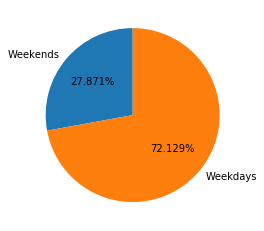

In [12]:
# Displaying results in a pie chart
plt.pie([crimesOnWeekends, crimesOnWeekdays], labels = ['Weekends', 'Weekdays'], autopct='%.3f%%',startangle = 90)
plt.show()

The proportion of crimes during the weekdays (72%) is almost two and half times that of the proportion of the crimes that occurred during the weekends (28%).

#### Crimes vs seasons

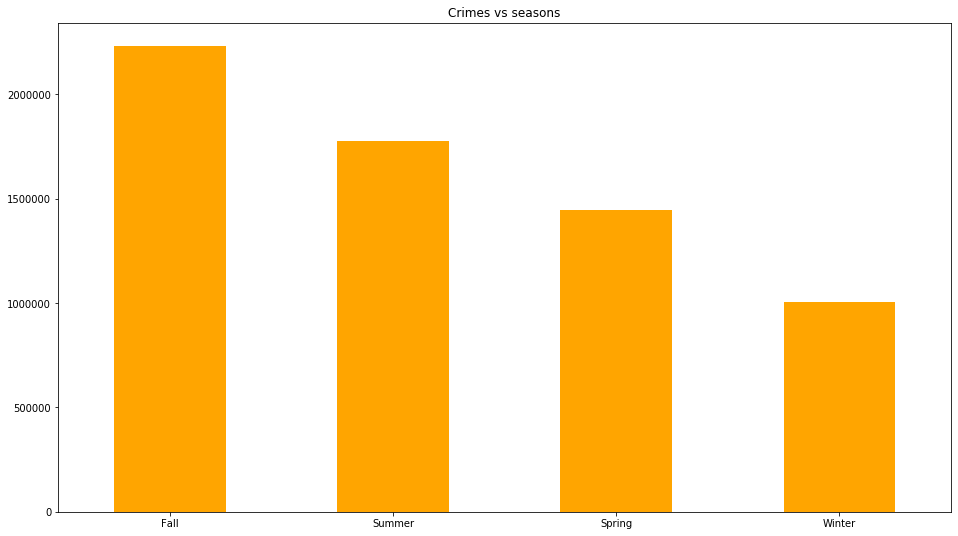

In [13]:
plotted = filtered_data['Season'].value_counts()
plotted.plot(kind='bar', figsize=(16, 9), rot = 0,color = "orange", title = 'Crimes vs seasons', x = 'SEASON', y = 'NUMBER OF CRIMES')

The number of crimes reported in Winter are very low where as the ones reported in Fall are very high (approximately two and half times that of the Winter crimes). The next highest crimes took place in Summer. Noticeable that the number of crimes is high during warm seasons. 

### 3) Investigating the crime over years

In [14]:
# Yearly crime statistics
yearlyStatistics = filtered_data['Year'].value_counts()
yearlyStatistics.sort_index(ascending = False, inplace = True)

In [15]:
# Crime rates till 2019 as 2020 is present year and not yet completed
yearlyStatistics.drop(2020, inplace = True)

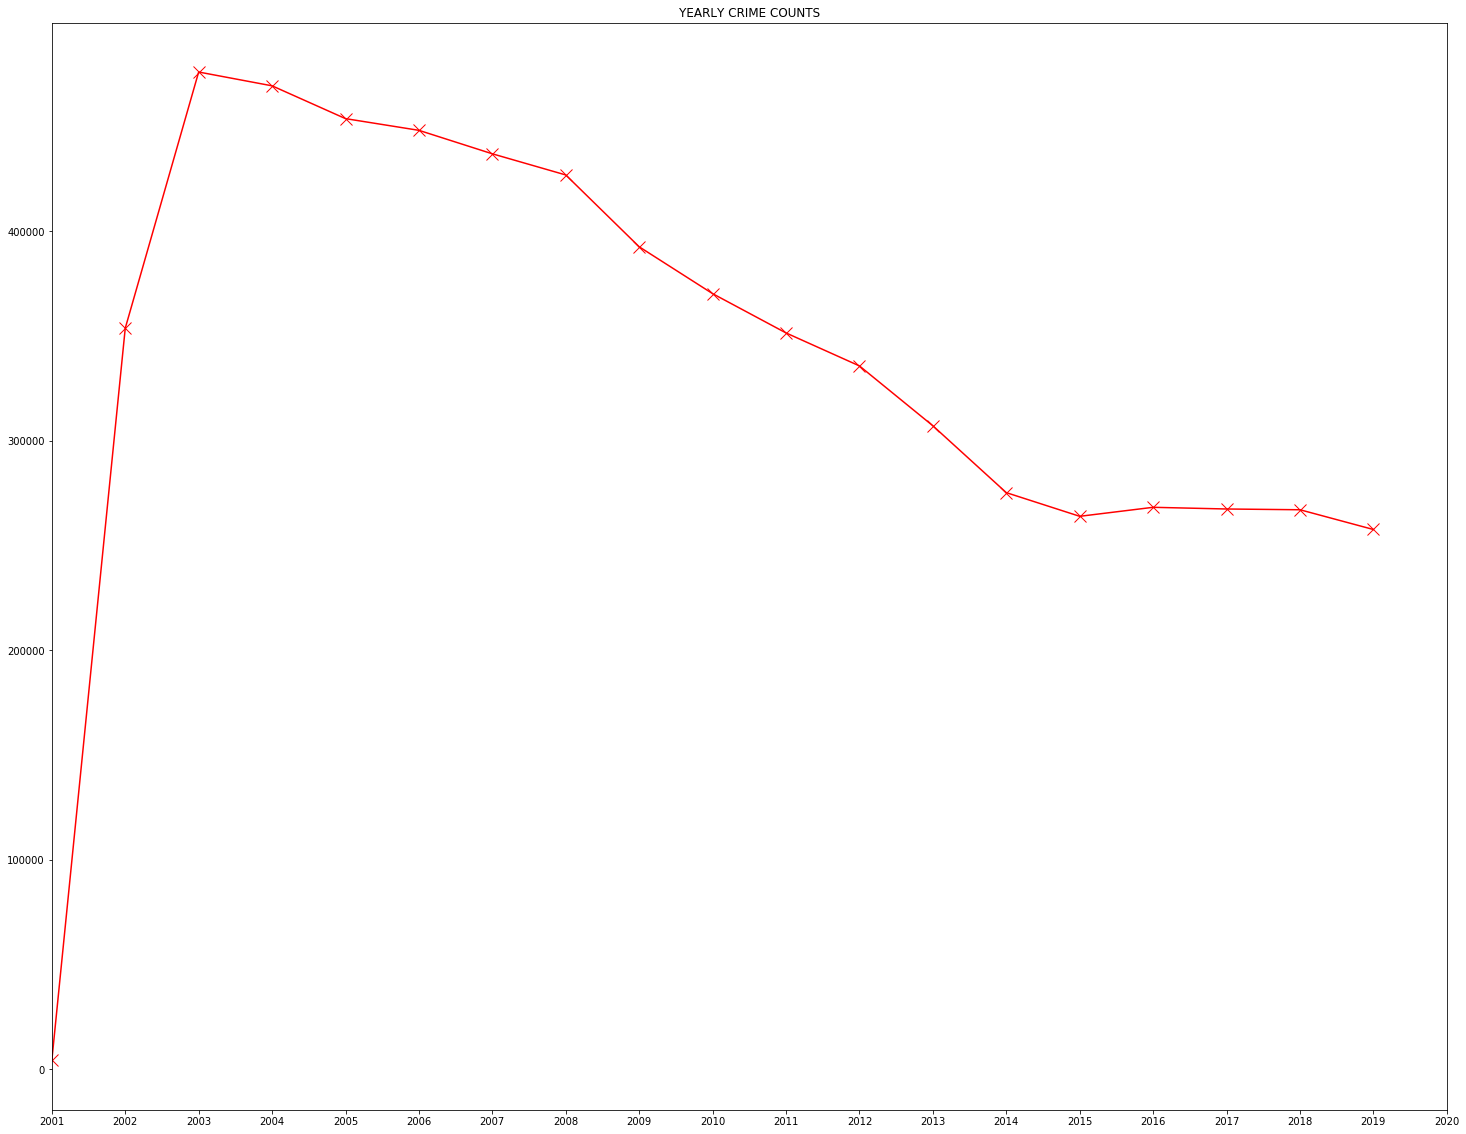

In [16]:
# Plotting a line chart for yearly time series crime data
yearsList = []
for i in range(2001, 2021):
    yearsList.append(i)
yearlyStatistics.plot(figsize = (25, 20), x = 'YEAR', y = 'NUMBER OF CRIMES', title = 'YEARLY CRIME COUNTS', kind = 'line', xticks= yearsList, marker = 'x', markersize = 12, color = "red")

There is a drastic increase in the crimes from 2001 to 2003. 
From then on, the number of crimes kept dropping till 2015. 
From 2016, the number of crimes remained almost same till 2018.

### 4) Relation between type of crime and whether an arrest was made

In [17]:
# Multi level grouping by arrest and type of crime
arrestCrime = filtered_data.groupby( ['Primary Type', 'Arrest'] )
arrestCrime = arrestCrime.count()['ID']

Chances of arrest for PROSTITUTION = 99.56816174305624
Chances of arrest for PUBLIC INDECENCY = 99.39393939393939
Chances of arrest for NARCOTICS = 99.37047453049905
Chances of arrest for GAMBLING = 99.24890310106343
Chances of arrest for LIQUOR LAW VIOLATION = 98.99391480730223
Chances of arrest for CONCEALED CARRY LICENSE VIOLATION = 96.52014652014653
Chances of arrest for INTERFERENCE WITH PUBLIC OFFICER = 92.61899009422565
Chances of arrest for OBSCENITY = 80.50713153724247
Chances of arrest for WEAPONS VIOLATION = 78.04433605524196
Chances of arrest for CRIMINAL TRESPASS = 71.98148539590142
Chances of arrest for OTHER NARCOTIC VIOLATION = 68.25396825396825
Chances of arrest for PUBLIC PEACE VIOLATION = 66.61475906220261
Chances of arrest for HOMICIDE = 46.66461095693288
Chances of arrest for NON-CRIMINAL (SUBJECT SPECIFIED) = 33.333333333333336
Chances of arrest for SEX OFFENSE = 28.745522664580676
Chances of arrest for ASSAULT = 22.823261737829384
Chances of arrest for BATTERY = 

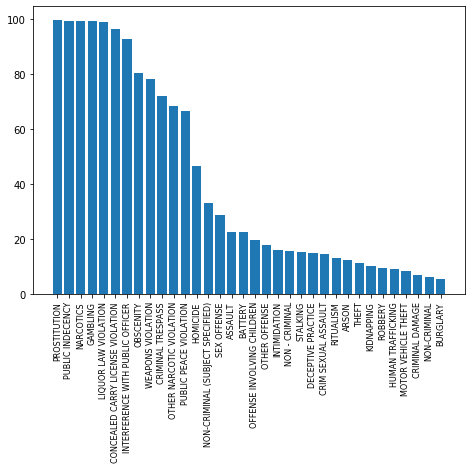

In [18]:
probability_dict = {}

for val in range(0, len(arrestCrime.keys()), 2):
    crime = arrestCrime.keys()[val][0]
    
    probability = (arrestCrime[val+1] * 100) / (arrestCrime[val] + arrestCrime[val+1])
    probability_dict[crime] = probability
    
values = probability_dict.items()
probability_dict = sorted(values, key = lambda p: p[1], reverse = True)

X = []
Y = []
for crime in probability_dict:
    print("Chances of arrest for " + crime[0] + " = " +  str(crime[1]))
    X.append(crime[0])
    Y.append(crime[1])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X,Y)
plt.xticks(fontsize = 8, rotation = 90)
plt.show()


For Prostituition, Public indecency, Narcotics, gambling, Liqour law violation, Concealed carry license violation, Interference with public officer, the probabilities of getting arrested is very high.

For Kidnapping, Robbery, Human trafficking, Motor vehicle theft, Criminal damage, Non-criminal, Burglary, the probabilities of getting arrested is low.

### 5) Crimes over a region by Beat

In [29]:
# District crimes
crimesDistrict = filtered_data['District'].value_counts().to_frame()
crimesDistrict.reset_index(inplace = True)
crimesDistrict.rename(columns = {'index':'District', 'District':'Total'}, inplace = True)

print('Top 3 wards with largest crimes from 2001 to 2020 \n {}'.format(crimesDistrict.head(3)))

Top 3 wards with largest crimes from 2001 to 2020 
    District   Total
0       8.0  439647
1      11.0  418999
2       7.0  382131


In [20]:
# ward crimes by year
crimesWardYearly = filtered_data.groupby( ['Year','Ward'] )
crimesWardYearly = crimesWardYearly.count()['ID']

years = []
wards = []
for i in range(2001, 2021):
    years.append(i)
    
for i in range(1, 51):
    wards.append(i* 1.0)

print('The top 5 highest number of crimes over the years:')
for year in years:
    print('\n{} '.format(year))
    
    TopFiveWards = crimesWardYearly[year].nlargest(n = 5)
    print(TopFiveWards)

The top 5 highest number of crimes over the years:

2001 
Ward
28.0    234
24.0    221
27.0    191
42.0    145
17.0    136
Name: ID, dtype: int64

2002 
Ward
2.0     14306
28.0    13976
3.0     13702
27.0    13701
42.0    12956
Name: ID, dtype: int64

2003 
Ward
28.0    20795
2.0     20088
3.0     18524
27.0    17809
24.0    16752
Name: ID, dtype: int64

2004 
Ward
28.0    20864
2.0     19018
27.0    17814
24.0    17611
3.0     17184
Name: ID, dtype: int64

2005 
Ward
28.0    20587
2.0     17695
27.0    17584
24.0    17102
3.0     16177
Name: ID, dtype: int64

2006 
Ward
28.0    21570
2.0     16907
24.0    16630
27.0    16301
20.0    15745
Name: ID, dtype: int64

2007 
Ward
28.0    19566
2.0     16213
24.0    16132
17.0    15453
20.0    15351
Name: ID, dtype: int64

2008 
Ward
28.0    18874
2.0     15744
24.0    15551
42.0    15105
17.0    15071
Name: ID, dtype: int64

2009 
Ward
28.0    17687
42.0    14088
24.0    13886
27.0    13777
2.0     13585
Name: ID, dtype: int64

2010 
Ward
28

Ward 28, 42, 27, 24 are almost always in the top five crime locations for all years

For all years except 2017 and 2018, Ward 28 is either on the first place or on the second place.  

For 2019, 2020 (till present), the top five wards have not changed. 

### 6) Percentage of domestic crimes that ended in arrest

Not arrested for domestic crimes 694572 
Arrested for domestic crimes 170061

Domestic crimes that ended in arrest: 19.6685761473365%


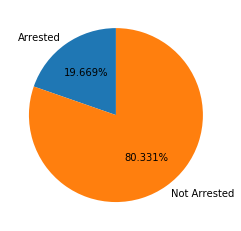

In [21]:
# getting domestic crime values
crimesDomestic = filtered_data[ filtered_data['Domestic'] == True ]
print('Not arrested for domestic crimes {0} \nArrested for domestic crimes {1}'.format(crimesDomestic['Arrest'].value_counts()[0],crimesDomestic['Arrest'].value_counts()[1]))

sum = (crimesDomestic['Arrest'].value_counts()[1] + crimesDomestic['Arrest'].value_counts()[0])
proportion = (100 * crimesDomestic['Arrest'].value_counts()[1]) / sum
print('\nDomestic crimes that ended in arrest: {}%'.format(proportion))

# Showing the proportions on a pie chart
plt.pie([crimesDomestic['Arrest'].value_counts()[1], crimesDomestic['Arrest'].value_counts()[0]], labels = ['Arrested', 'Not Arrested'], autopct='%.3f%%', startangle = 90)
plt.show()

### 7) Other interesting insights

#### i) Categories of Arson

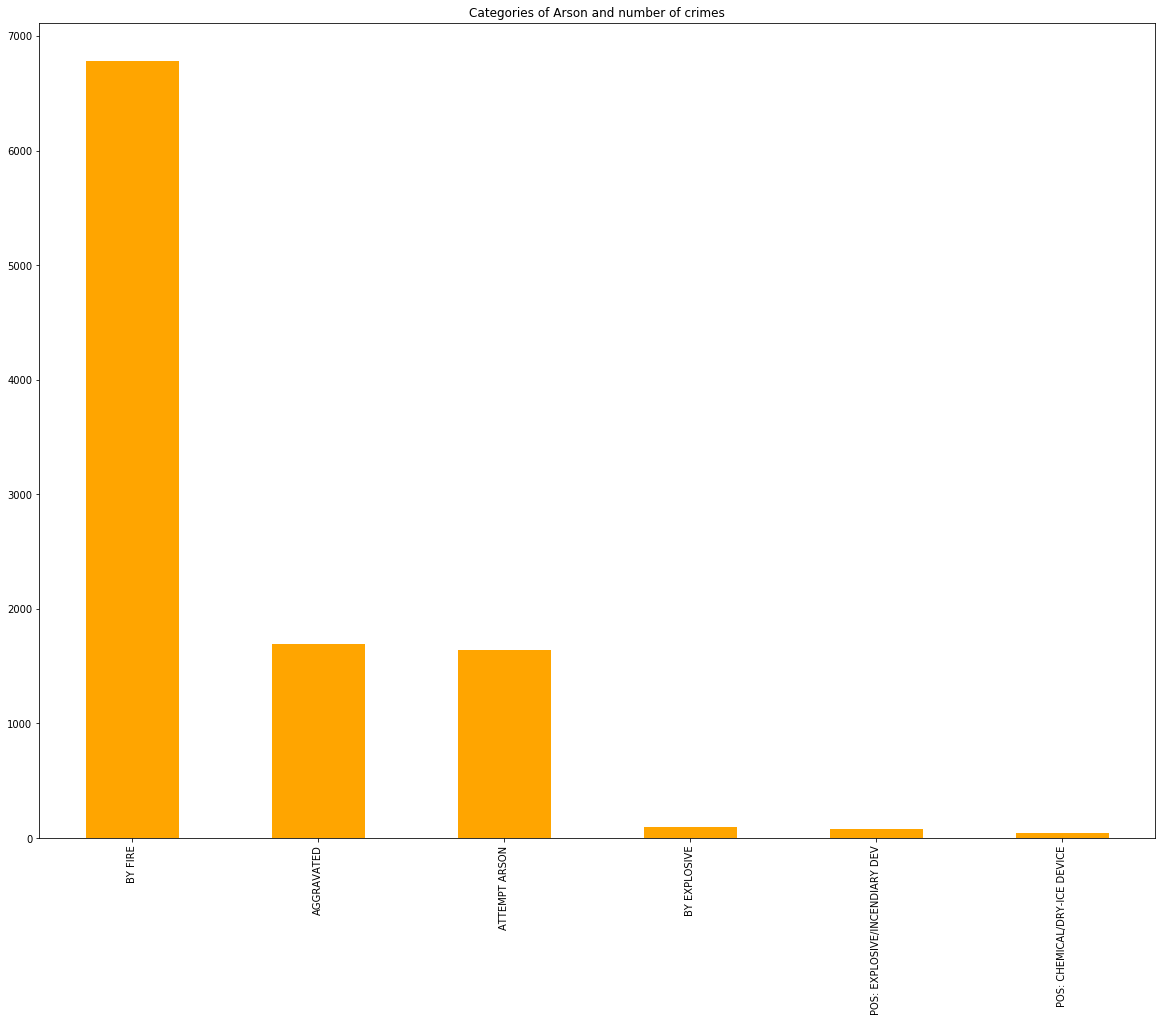

In [22]:
# Getting all Arson cases
arsons = filtered_data[filtered_data['Primary Type'] == 'ARSON']

# identifying different categories of theft
arsonCategories = arsons['Description'].value_counts()

# visualization
arsonCategories.plot(kind = 'bar', figsize = (20, 15), color = "orange", title="Categories of Arson and number of crimes", x='Category of Arson', y='Number of crimes')

It can be observed that by fire is the most common type of arson. Aggravated and Attempted arson are almost same in number. By explosive, Pos:Exposive/Incendiary Dev, Pos:Chemical/Dry-Ice Device, the number of cases recorded are very low comparitively.

#### ii) Type of crime vs Location of crime

In [33]:
# Beat vs Crime type
districtCrimeType = filtered_data.groupby( ['Primary Type', 'District'] )
districtCrimeType = districtCrimeType.count()['ID']

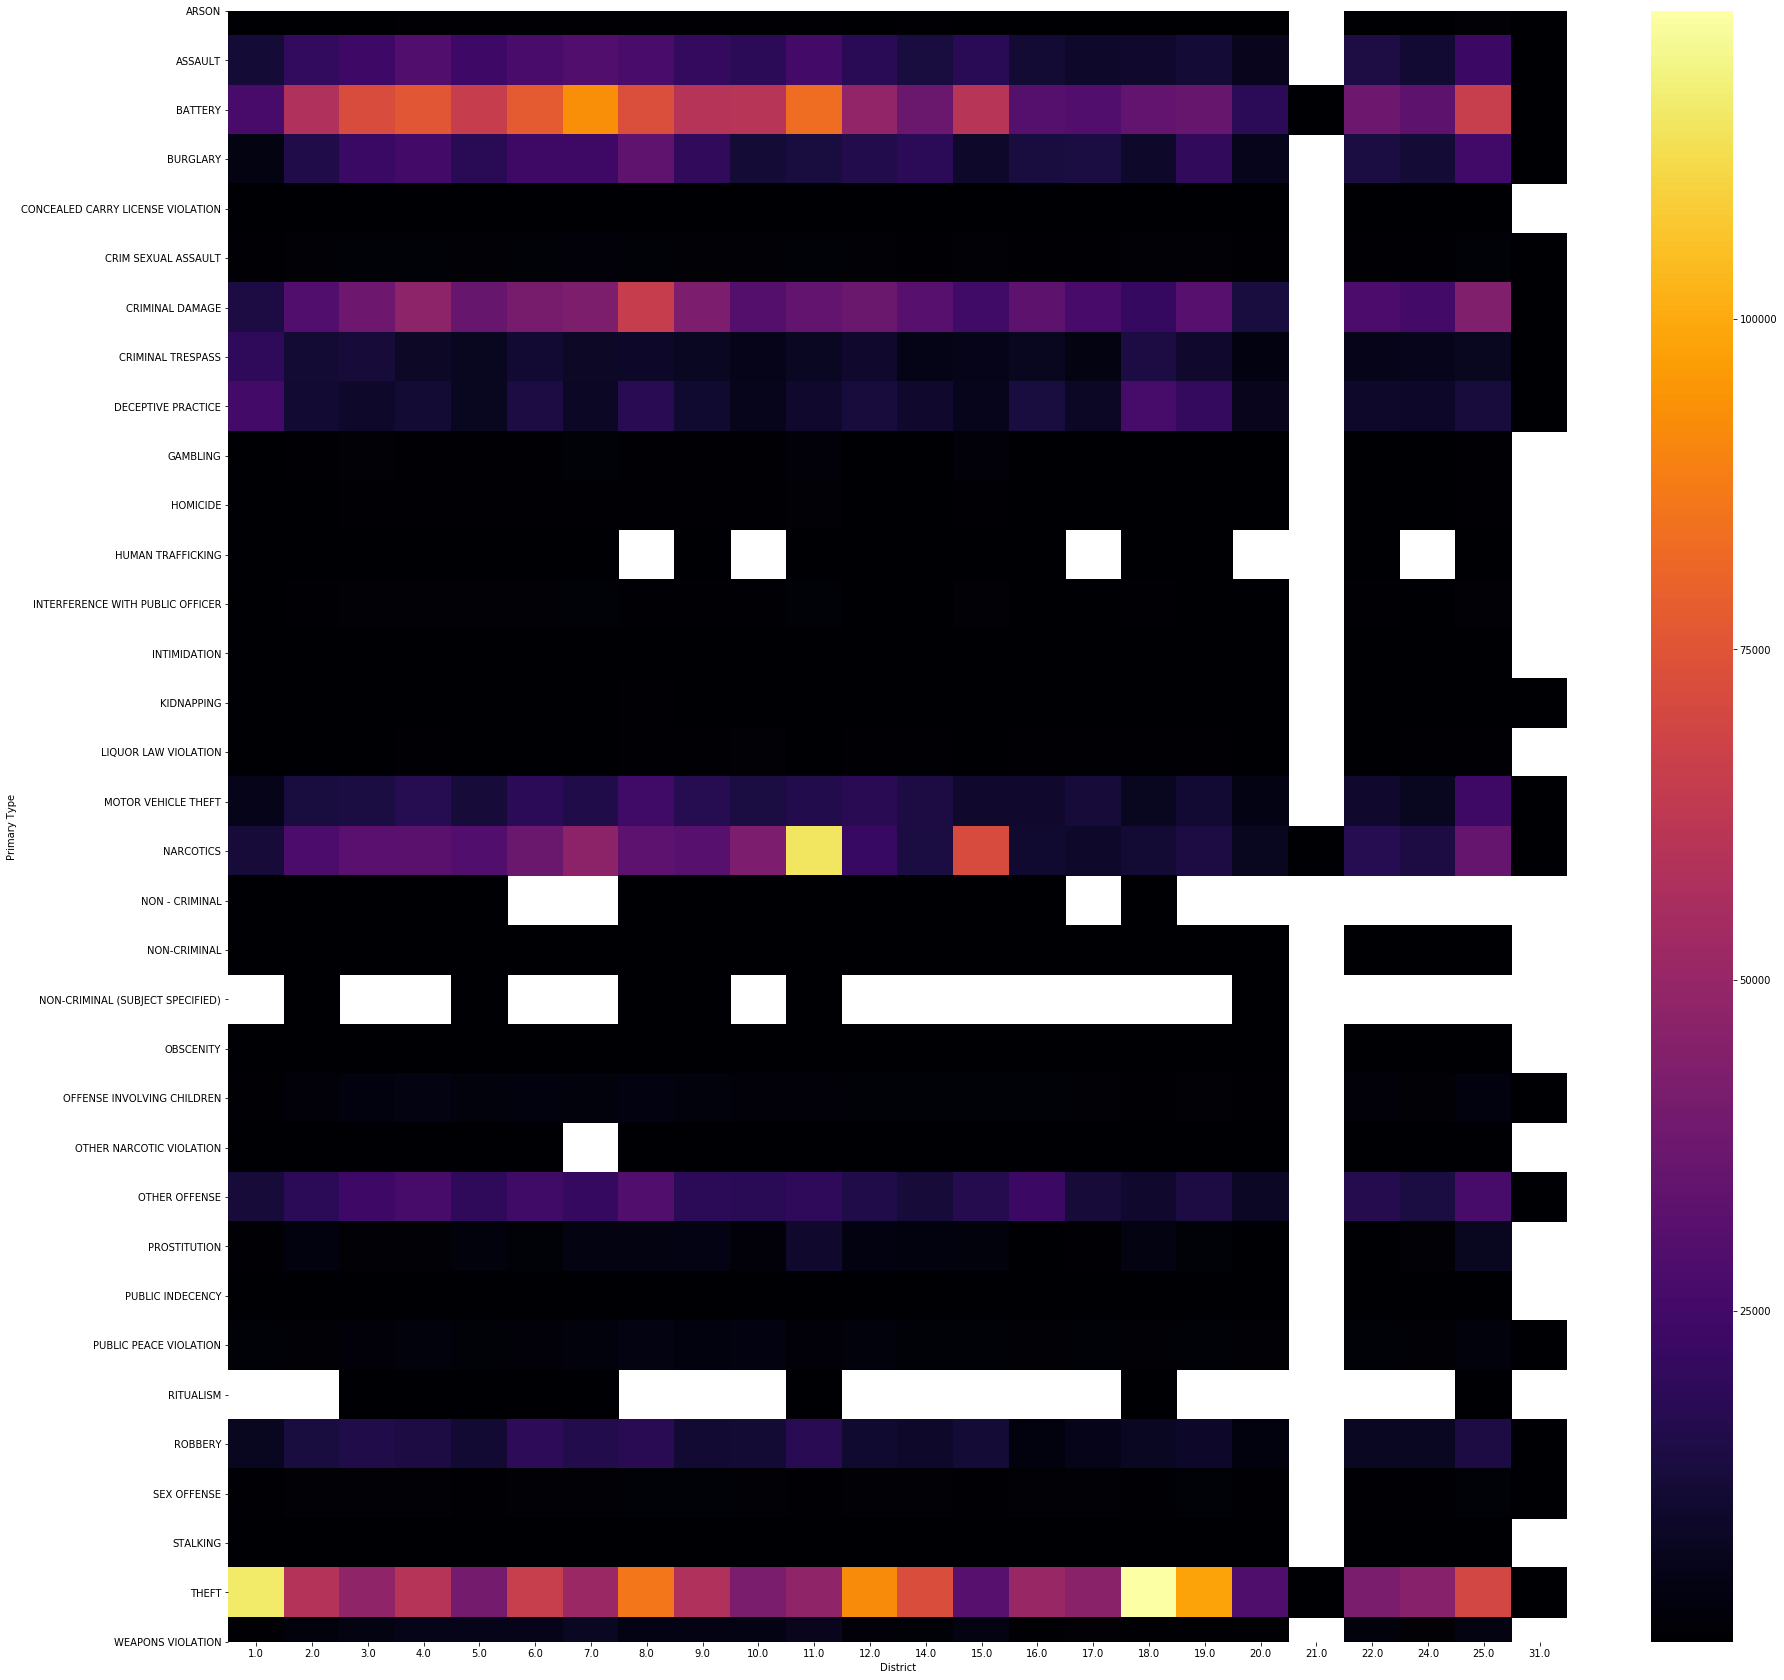

In [34]:
districtCrimeType1 = districtCrimeType.unstack(level = -1)

plt.subplots(figsize=(30, 30))
sns.heatmap(beatCrimeType1,xticklabels='auto', yticklabels='auto', cmap="inferno")

This is a heatmap representing the District number, type of crime and the number of crimes. It can be observed that, the white spaces indicate that the particlar crime has not taken place in that particular Beat. Ritualism  and Non criminal crimes occurs less frequently thats any other crime for all districts. Theft record the highest number of crimes in all the districts. Theft, Nracotics and Battery are the only crimes taking place in district 21. Battery, Criminal damage, Narcotics and theft show high values of crimesin all the districts.